<CENTER><img src="http://opendata.atlas.cern/DataAndTools/pictures/ATLASOD.gif" style="width:50%"></CENTER>

<CENTER><h1>Searching for the Higgs boson in the H&#8594;&gamma;&gamma; channel</h1></CENTER>
## Python notebook example

**Introduction**
Let's take a current ATLAS Open Data sample and create a histogram:

In [1]:
import ROOT
from ROOT import TMath
import time
from ROOT import TCanvas, TFile, TPaveText, TGraphErrors, TPad, TF1, TH1F
from ROOT import gROOT, gBenchmark
from array import array
import numpy as np

Welcome to ROOTaaS 6.06/08


In [2]:
start = time.time()

Because we would like to use more than one ROOT input file, the best option is to use a TChain object. This allows to "chain" several samples into a single structure that we can later loop over

In [3]:
canvas = ROOT.TCanvas("Canvas","cz",1000,1000)
canvas.cd()

n_bins = 300

pad1 = TPad( 'pad1', 'The pad with the histogram', 0.03, 0, 0.97, 0.25, 21 )
pad2 = TPad( 'pad2', 'The pad with the function',  0.03, 0.30, 0.97, 0.55, 21 )
pad3 = TPad( 'pad3', 'The pad with the histogram', 0.03, 0.60, 0.97, 0.85, 21 )

pad1.Draw()
pad2.Draw()
pad3.Draw()

pad3.cd()

f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/Data/data-All-yy.root")


tree = f.Get("mini")
hist = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",n_bins,80,280)

n_read = 10000000

Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 50000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree.photon_n):
            ##
            if(tree.photon_isTightID[j]):
                ##
                if(tree.photon_pt[j] > 25000 and (TMath.Abs(tree.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree.photon_eta[j]) < 1.37 or TMath.Abs(tree.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree.photon_ptcone30[goodphoton1_index]/tree.photon_pt[goodphoton1_index] < 0.065)\
               and (tree.photon_etcone20[goodphoton1_index] / tree.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree.photon_ptcone30[goodphoton2_index]/tree.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree.photon_etcone20[goodphoton2_index] / tree.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree.photon_pt[goodphoton1_index]/1000., tree.photon_eta[goodphoton1_index],\
                                          tree.photon_phi[goodphoton1_index],tree.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree.photon_pt[goodphoton2_index]/1000., tree.photon_eta[goodphoton2_index],\
                                          tree.photon_phi[goodphoton2_index],tree.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events
#hist.Draw()
#canvas.Draw()




TClass::Init:0: RuntimeWarning: no dictionary for class ROOT::TIOFeatures is available


0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000
1450000
1500000
1550000
1600000
1650000
1700000
1750000
1800000
1850000
1900000
1950000
2000000
2050000
2100000
2150000
2200000
2250000
2300000
2350000
2400000
2450000
2500000
2550000
2600000
2650000
2700000
2750000
2800000
2850000
2900000
2950000
3000000
3050000
3100000
3150000
3200000
3250000
3300000


RuntimeError: TTree I/O error

Error in <TWebFile::GetFromWeb10>: expected -733469519 bytes, got 0
Error in <TBranchElement::GetBasket>: File: http://opendata.atlas.cern/release/samples/2019/GamGam/Data/data-All-yy.root at byte:711403906, branch:jet_pt_syst, entry:3344563, badread=1, nerrors=1, basketnumber=2413


In [4]:

md_data = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/2019/GamGam/MC/mc15_13TeV.343981.PwPy8EG_NNLOPS_nnlo_30_ggH125_gamgam.gamgam_raw.root")
tree2 = md_data.Get("mini")
hist2 = ROOT.TH1F("h_M_Hyy","Invariant Mass of di-photon system ; Invariant Mass m_{yy} [GeV] ; events",n_bins,80,280)


Photon_1 = ROOT.TLorentzVector()
Photon_2 = ROOT.TLorentzVector()
#n = 0
for n, event in enumerate(tree2):
    #####n += 1
    ## printing the evolution in number of events
    #if(n % (n_read / 500) == 0):
    if(n % 100000 == 0):
        print(n)
    if( n > n_read ):
        break
    ## checking the trigger    
    if(tree2.trigP):
        goodphoton_index = [0]*5
        goodphoton_n = 0
        photon_index = 0
        ##            
        j=0
        ## looping the photons per event
        for j in range(tree2.photon_n):
            ##
            if(tree2.photon_isTightID[j]):
                ##
                if(tree2.photon_pt[j] > 25000 and (TMath.Abs(tree2.photon_eta[j]) < 2.37)\
                   and (TMath.Abs(tree2.photon_eta[j]) < 1.37 or TMath.Abs(tree2.photon_eta[j]) > 1.52)):
                    ##
                    goodphoton_n += 1  #count
                    goodphoton_index[photon_index]=j
                    photon_index += 1
                ## end Pt and eta pre-selection
            ## end on request of quality of the photon
        ## end looping photons in the current event
            
        ## Using the two selected photons
        if(goodphoton_n==2):
            ##
            goodphoton1_index = goodphoton_index[0]
            goodphoton2_index = goodphoton_index[1]
            ## Getting couple of photons with good isolation 
            if((tree2.photon_ptcone30[goodphoton1_index]/tree2.photon_pt[goodphoton1_index] < 0.065)\
               and (tree2.photon_etcone20[goodphoton1_index] / tree2.photon_pt[goodphoton1_index] < 0.065)):
                ##
                if((tree2.photon_ptcone30[goodphoton2_index]/tree2.photon_pt[goodphoton2_index] < 0.065)\
                   and (tree2.photon_etcone20[goodphoton2_index] / tree2.photon_pt[goodphoton2_index] < 0.065)):
                    ##
                    Photon_1.SetPtEtaPhiE(tree2.photon_pt[goodphoton1_index]/1000., tree2.photon_eta[goodphoton1_index],\
                                          tree2.photon_phi[goodphoton1_index],tree2.photon_E[goodphoton1_index]/1000.)
                    Photon_2.SetPtEtaPhiE(tree2.photon_pt[goodphoton2_index]/1000., tree2.photon_eta[goodphoton2_index],\
                                          tree2.photon_phi[goodphoton2_index],tree2.photon_E[goodphoton2_index]/1000.)
                    ## Adding the two TLorentz vectors
                    Photon_12 = Photon_1 + Photon_2
                    ## Filling with the mass of the gamma-gamma system
                    hist2.Fill(Photon_12.M())
                ## end isolation photon #2
            ## end isolation photon #1
        ## end 2-good photons
    ## end of trigger request
## End loop in the events

#canvas.Draw()


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


#### Final plot

TWebFile::Append:0: RuntimeWarning: Replacing existing TH1: net (Potential memory leak).


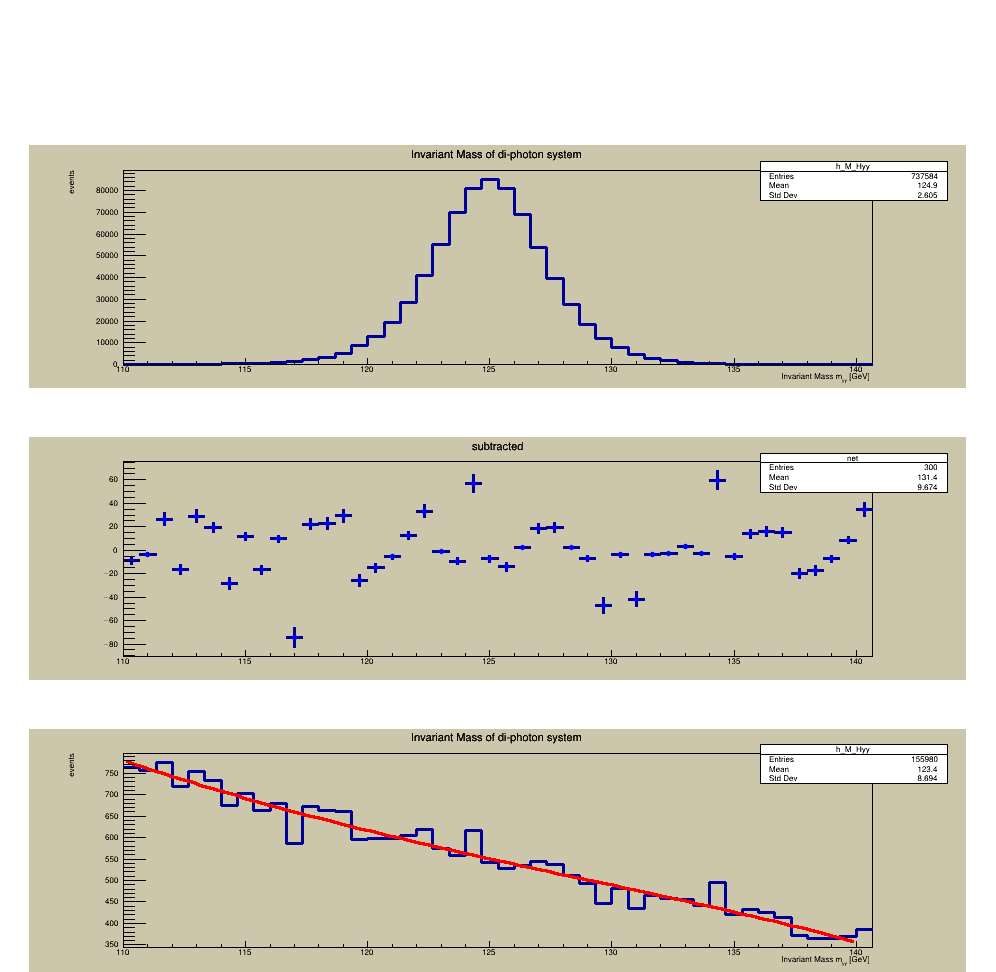


****************************************
Minimizer is Linear
Chi2                      =      48.4019
NDf                       =           40
p0                        =      509.957   +/-   221794      
p1                        =      168.156   +/-   7116.56     
p2                        =     -3.62622   +/-   85.4708     
p3                        =    0.0266208   +/-   0.455391    
p4                        =  -6.6818e-05   +/-   0.00090822  


In [38]:
specific_range = (110,  140)
degree = 4
g1 = TF1( 'g1', 'pol'+str(degree),  specific_range[0],  specific_range[1] )
#g1 = TF1( 'g1', 'exp',  specific_range[0],  specific_range[1] )



hist.Fit( g1, 'R' )

g1.GetParameters()



hist.SetAxisRange(specific_range[0],  specific_range[1])

specific_range = (110,  140)

pad2.cd()

params = np.zeros(degree + 1)

for i in range(degree + 1):
    params[i] = g1.GetParameters()[i]

def fitFunc(x):
    
    return np.poly1d(params[::-1])(x)

net = TH1F("net","subtracted",hist.GetNbinsX(),80,280)
for i in range(1,hist.GetNbinsX()+1):
    x=hist.GetBinCenter(i)
    y=fitFunc(x)    
    net.SetBinContent(i,hist.GetBinContent(i)-y)
    #print(hist.GetBinContent(i)-y)
    #print(hist.GetBinContent(i)-y)
    #net.SetBinContent(1,1)
net.SetAxisRange(specific_range[0],  specific_range[1])
#net.Draw('E')
hist2.SetAxisRange(specific_range[0],  specific_range[1])



pad2.cd()
net.Draw('E')
#hist.Draw()

pad1.cd()
hist.Draw()

pad3.cd()
hist2.Draw()

canvas.Draw()



In [26]:
params

array([ -5.13891025e+06,   2.51089729e+05,  -5.08790605e+03,
         5.47511881e+01,  -3.30058159e-01,   1.05692919e-03,
        -1.40468472e-06])

In [92]:
params

array([  1.09818413e+04,  -8.88045863e+01,   1.81452729e-01])

In [35]:
tree.GetEntries()

7798448L

In [91]:
params

array([  1.09818413e+04,  -8.88045863e+01,   1.81452729e-01])

In [56]:
g1.GetParameters()[0]

3609.8137849084533

In [71]:
np.poly1d(params)(180)

649752.83033860673

In [90]:
print(np.poly1d(params)(100))

109809532.868
